INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_178c02a5406161be38e651d2070345d3 NOW.


1.5733333333333335 1.7975 1.5


Inference for Stan model: anon_model_178c02a5406161be38e651d2070345d3.
4 chains, each with iter=400; warmup=200; thin=1; 
post-warmup draws per chain=200, total post-warmup draws=800.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[1]      1.54  3.0e-3   0.06    1.4    1.5   1.55   1.59   1.66    453    1.0
mu[2]       1.5  3.4e-3    0.1   1.31   1.43    1.5   1.57   1.69    863    1.0
mu[3]       1.5  3.6e-3    0.1    1.3   1.43    1.5   1.57    1.7    835    1.0
sigma[1]   0.16  6.4e-3   0.14   0.05   0.09   0.12   0.18   0.49    479   1.01
sigma[2]   1.01    0.03   1.04   0.03   0.29   0.72   1.35   4.02   1156    1.0
sigma[3]    1.0    0.04   0.97   0.03   0.29   0.73   1.36   3.68    575    1.0
lp__      -1.61    0.12    1.9  -6.18  -2.56  -1.26  -0.22   0.95    237   1.02

Samples were drawn using NUTS at Thu May  9 17:42:48 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction fa

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB49190320>,
      dtype=object)

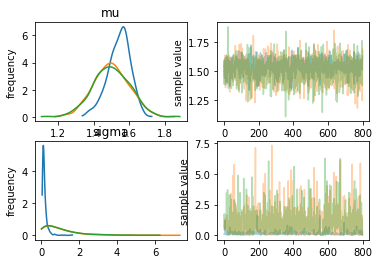

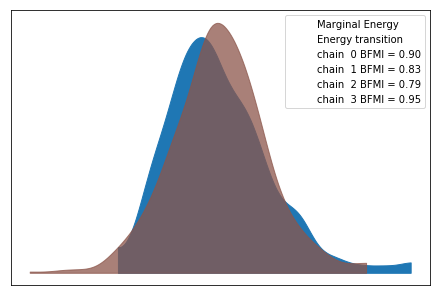

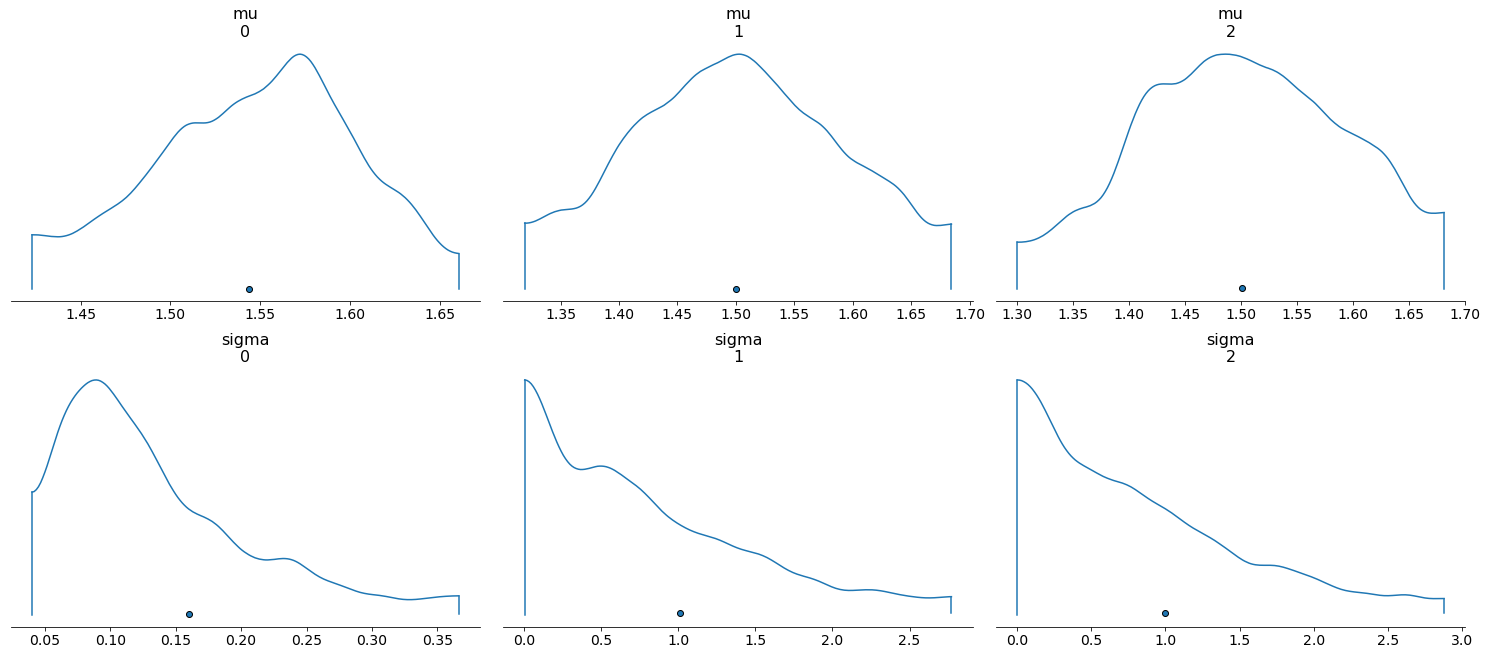

In [2]:
'''
    Example model from chapter 16 in Ben Lamberts Book
    A Student's Guide to Bayesian Statistics
'''
import pystan as stan
import arviz as az
import numpy as np
import matplotlib as plt
import scipy

x1=[1.53,1.67,1.52]
x2=[1.75,1.62,1.87,1.95]
x3=[1.25,1.75]
groups=[1,1,1,2,2,2,2,3,3]

Y=x1+x2+x3
N=len(Y)

print(np.mean(x1),np.mean(x2),np.mean(x3))

#Stan model
model = stan.StanModel(file='grouped_data.stan')
fit = model.sampling(data={'Y':Y,'N':N,'K':3,'groups':groups}, iter=400,chains=4)
print(fit)
fit.plot()
inf_data = az.convert_to_inference_data(fit)
az.plot_energy(inf_data)
az.plot_density(inf_data)